In [50]:
import pandas as pd

A = pd.read_json("final.json")
df=pd.DataFrame(A, columns=[ 'volume', 'gelo', 'difsupperc', 'preres', 'final']) ##columns=[]
A.columns
df.columns



Index(['volume', 'gelo', 'difsupperc', 'preres', 'final'], dtype='object')

In [51]:
X=df[df.columns[:-1]]
Y=df[df.columns[-1:]]



In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2)

print(len(X_train),len(X_test))

256 64


In [53]:
from sklearn.linear_model import LinearRegression

funcao_regressao=LinearRegression()

funcao_regressao.fit(X_train,Y_train)




LinearRegression()

In [54]:
funcao_regressao.score(X_train, Y_train)

0.04073842795449556

In [55]:
Previsoes= funcao_regressao.predict(X_test)
import numpy as np
from sklearn import metrics

print('RMSE', np.sqrt(metrics.mean_squared_error(Y_test, Previsoes)))

RMSE 0.6056443117195685


In [56]:
'''
print(funcao_regressao.predict([[1.0]]));
'''

'\nprint(funcao_regressao.predict([[1.0]]));\n'

In [57]:
import statsmodels.api as sm

est=sm.OLS(Y,X).fit()
est.params

volume       -0.000876
gelo         -0.005254
difsupperc   -0.055925
preres        0.005276
dtype: float64

In [58]:
est.rsquared_adj

0.01998591363608393

In [59]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  final   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              2.631
Date:                Fri, 11 Feb 2022   Prob (F-statistic):                      0.0344
Time:                        13:09:40   Log-Likelihood:                         -440.29
No. Observations:                 320   AIC:                                      888.6
Df Residuals:                     316   BIC:                                      903.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
volume        -0.0009      0.000     -2.342      0.020      -0.002      -0.000
gelo          -0.0053      0.002     -2.118      0.035      -0.010      -0.000
difsupperc    -0.0559      0.025     -2.282      0.023      -0.104      -0.008
preres         0.0053      0.002      2.132      0.034       0.000       0.010
==============================================================================
Omnibus:                      386.139   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44296.140
Skew:                           5.161   Prob(JB):                         0.00
Kurtosis:                      59.707   Cond. No.                     1.83e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
resultado= est.predict()
resultado
#print (pd.crosstab(Y_test, resultado, rownames=['Real'], colnames=['Predito'], margins=True))

array([ 5.82870039e-01,  6.88887750e-01,  8.62504257e-01, -1.30272503e+00,
        3.70175194e-01,  7.79263647e-01,  9.89479980e-02,  1.42404156e+00,
        2.12777889e-01,  5.10114250e-01,  9.90943109e-01,  3.85640392e-01,
        2.64176891e-01,  7.81863025e-01,  5.53142340e-01,  1.03583814e-01,
        9.10650666e-01,  6.71471512e-01,  8.05351382e-01,  8.23697759e-01,
        8.34532966e-01,  8.78119358e-01,  6.16128069e-01,  9.14342418e-01,
        3.97105624e-01,  4.84318194e-01,  7.13170954e-01,  9.12122479e-01,
        4.55483252e-01,  9.28502904e-02,  6.63042111e-01,  4.19618002e-01,
        6.19402379e-01,  8.94262499e-01,  7.27893944e-01,  2.88887432e-01,
        4.58632790e-01,  8.24799815e-01,  9.05644551e-01,  6.35114431e-01,
        7.75601456e-01,  6.32365374e-01,  5.63467158e-01,  4.34443652e-01,
        4.48100542e-01,  3.63232218e-01,  1.16732912e+00,  6.10099147e-01,
        3.55593933e-01,  3.90976731e-01,  2.95483908e-01,  4.77442786e-01,
        5.35522732e-01,  

In [101]:
for index in range(320):
    qualcry= pd.DataFrame(A, columns=['cry'],index=[index])
    print(qualcry, resultado[index])


     cry
0  1INCH 0.582870038768663
    cry
1  AAVE 0.6888877496272702
   cry
2  ACA 0.8625042565499014
   cry
3  ACH -1.3027250337749838
   cry
4  ACM 0.3701751937949535
   cry
5  ADA 0.7792636473969907
   cry
6  ADX 0.09894799798734022
    cry
7  AGLD 1.4240415550099614
    cry
8  AION 0.21277788859808472
    cry
9  AKRO 0.510114249518268
     cry
10  ALCX 0.9909431086351373
     cry
11  ALGO 0.38564039210296963
      cry
12  ALICE 0.2641768910828617
       cry
13  ALPACA 0.7818630251068726
      cry
14  ALPHA 0.5531423397088295
    cry
15  AMP 0.10358381384625096
    cry
16  ANC 0.910650666035806
     cry
17  ANKR 0.671471512121097
    cry
18  ANT 0.8053513823280106
    cry
19  ANY 0.8236977586558117
     cry
20  API3 0.8345329656831373
   cry
21  AR 0.8781193584790843
     cry
22  ARDR 0.6161280685933264
     cry
23  ARPA 0.9143424178175902
    cry
24  ASR 0.39710562435566926
    cry
25  ATA 0.48431819372485324
    cry
26  ATM 0.7131709542842941
     cry
27  ATOM 0.9121224793214361

Text(0, 0.5, 'final')

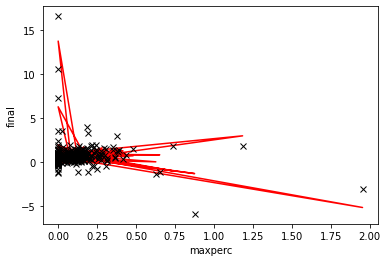

In [102]:

import matplotlib.pyplot as plt
##plt.figure(figsize=(10,10))
##plt.scatter(X_train, Y_train)
##plt.plot(X_test, funcao_regressao.predict(X_test), color='red')
plt.plot(df['maxperc'], est.predict(),'r-', label='predicted' )

plt.plot(df['maxperc'], df['final'], 'kx', label='data'  )
plt.xlabel('maxperc')
plt.ylabel('final')